# (Collisional excitation / collisional de-excitation) + (radiative ionization / radiatve recombination + dielectronic recombination)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
elements = [
    lss.O1Inasan(),
    lss.O2Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
# elements[0].keys = elements[0].all_keys; elements[1].keys = elements[1].all_keys
# elements[0].keys = ["12P3P4", "12P1D4"]; elements[1].keys = ["22P4S"]
# elements[0].keys = ["12P3P4", "13S3S"]; elements[1].keys = ["22P4S"]
elements[0].keys = ["12P3P4", "12P1D4", "13S3S"]; elements[1].keys = ["22P4S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
# population_nlte_1[0] = 1.0
# population_nlte_1[0] = 0.5
# population_nlte_1[1] = 0.0
# population_nlte_1[2] = 0.5
population_nlte_1[0] = 0.4
population_nlte_1[1] = 0.1
population_nlte_1[2] = 0.1
population_nlte_1[3] = 0.4

delta_time = 0.01
# delta_time = 1.0e-20
# delta_time = 1.0e-30

count = int(1e3)
# temperatures = np.full(count, 1.0e4)
# temperatures = np.full(count, 1.0e3)
# temperatures = np.full(count, 2.0e3)
# temperatures = np.full(count, 4.0e3)
temperatures = np.full(count, 6.0e3)
electron_temperatures = temperatures
# electron_number_densities = np.linspace(1.0e1, 1.0e10, num=count)
electron_number_densities = np.linspace(1.0e1, 1.0e20, num=count)
optical_depth = 0.0

In [3]:
se = [
    Transition.SE_NIST_O1,
]
ce_balance = [
    Transition.CE_REGEMORTER,
]
ri_balance = [
    Transition.RBF_INASAN_O1,
    # Transition.PI_TASITSIOMI,
    Transition.RR_BADNELL_VERNER,
    # Transition.RR_SEATON,
    Transition.DR_BADNELL,
]

b_factors = calculate_b_factors(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *se,
        *ce_balance,
        *ri_balance
    ]
)

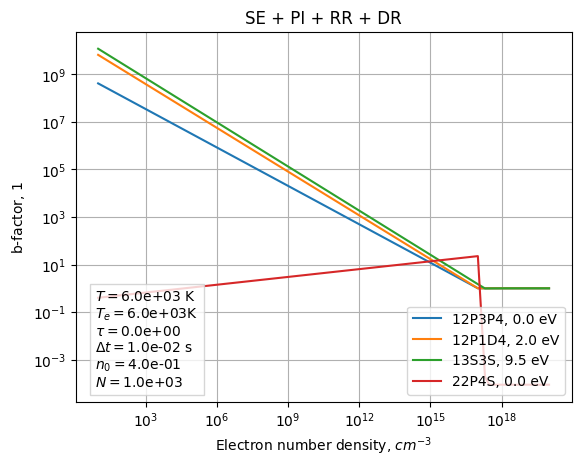

In [4]:
fig, ax = plt.subplots()

for s, element in enumerate(elements):
    for i, key in enumerate(element.keys):
        plt.plot(
            electron_number_densities,
            b_factors.T[i + sum([len(el.keys) for el in elements][:s])],
            label=f"{key}, {'{:.1f}'.format(element.levels[i].energy)} eV",
        )
# plt.plot(electron_number_densities, b_factors.T[0], label="12P3P4")
# plt.plot(electron_number_densities, b_factors.T[1], label="12P1D4")
# plt.plot(electron_number_densities, b_factors.T[2], label="13S3S")
# plt.plot(electron_number_densities, b_factors.T[3], label="22P4S")

# plt.title("CE/CD + SE + PI + RR + DR")
# plt.title("CE/CD + SE + PI")
# plt.title("SE + PI")
plt.title("SE + PI + RR + DR")
# plt.title("PI + RR")
# plt.title("PI + DR")
# plt.title("PI")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("b-factor, $1$")
plt.legend(loc='lower right')
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} K\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])}K\n"
    f"$\\tau = ${'{:.1e}'.format(optical_depth)}\n"
    f"$\\Delta t = ${'{:.1e}'.format(delta_time)} s\n"
    f"$n_0 = ${'{:.1e}'.format(population_nlte_1[0])}\n"
    f"$N = ${'{:.1e}'.format(count)}",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.grid()
plt.show()